In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
img = io.imread('/content/drive/MyDrive/Colab Notebooks/seg2.jpg')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#image to 2D array
rows, cols, channels = img.shape

image_float = np.array(img, dtype=np.float32) / 255.0 #normalize values 0 to 1 for better clustering
pixels = image_float.reshape((-1, channels))  # reshape into a 2d array because kmeans needs 2d input

print(img.shape)
print(pixels.shape)

(194, 259, 3)
(50246, 3)


In [ ]:
n = 4 #should be sufficient number of clusters for dashboard, the driver’s arms, cars ahead, and "etc"

skmodel = KMeans(
    n_clusters=n,
    init='k-means++',
    n_init='auto',
    random_state=999,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(pixels)
labels = skmodel.labels_
cluster_centers = skmodel.cluster_centers_


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#visualizing/color stuff
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, n))
coloring = (colors[:, :3] * 255).astype(np.uint8)


segmented_pixels = coloring[labels]  #color the segment based on a color for every cluster
segmented_image = segmented_pixels.reshape((rows, cols, 3))


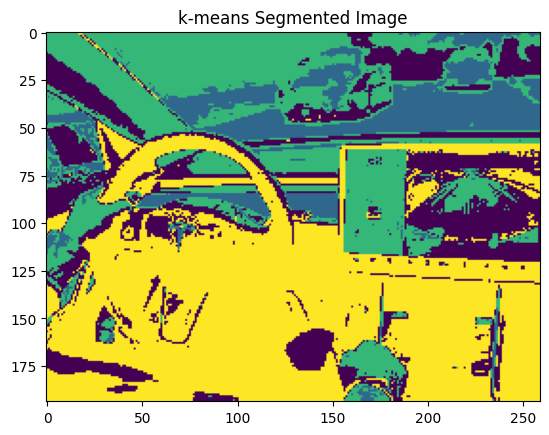

In [ ]:
plt.figure()
plt.imshow(segmented_image)
plt.title('k-means Segmented Image')
plt.show()